# Play with one binary simulation from MESA
author: [Mathieu Renzo](mailto:mrenzo@flatironinstitute.org)

In [1]:
import sys
sys.path.append('/mnt/home/mrenzo/codes/python_stuff/plotFunc/')
from MESAreader import *
import matplotlib.pyplot as plt
from plotDefaults import *

In [2]:
set_plotDefaults()

done in plotDefaults.py


In [4]:
root =  "/mnt/home/mrenzo/RUNS/zeta_ophiuchi//caseA_Z0.01/P5days/binary_to_donor_Hedepl/" #"/mnt/home/mrenzo/RUNS/zeta_ophiuchi/caseA_Z0.01/P8days/binary_to_donor_Hedepl/" # "/mnt/home/mrenzo/RUNS/binaries_experiment/40_30_P70/" #

/mnt/home/mrenzo/RUNS/zeta_ophiuchi//caseA_Z0.01/P5days/binary_to_donor_Hedepl/
... Binary file does not yet exist
... let me scrub this for you


Data in /mnt/home/mrenzo/RUNS/zeta_ophiuchi//caseA_Z0.01/P5days/binary_to_donor_Hedepl//LOGS1//history.data has been scrubbed.
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi//caseA_Z0.01/P5days/binary_to_donor_Hedepl//LOGS1//history.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


/mnt/home/mrenzo/anaconda3/lib/python3.7/site-packages/IPython/core/events.py:88: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  func(*args, **kwargs)


/mnt/home/mrenzo/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  fig.canvas.print_figure(bytes_io, **kw)


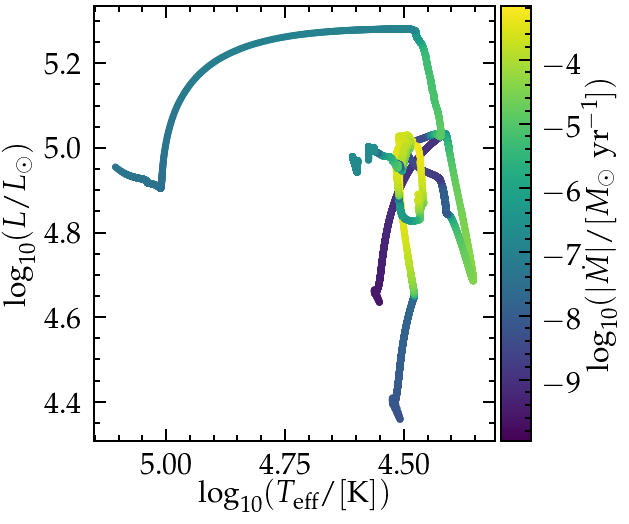

In [5]:
# HRD
def HRD(folder, fix_file=False, figName=""):
    print(colored(folder, "blue"))
    LOGS1 = folder+"/LOGS1/"
    LOGS2 = folder+"/LOGS2/"
    src1, col1 = getSrcCol(LOGS1+'/history.data',clean=True, convert=fix_file)
    src2, col2 = getSrcCol(LOGS2+'/history.data',clean=True, convert=fix_file)

    fig=plt.figure()
    gs = gridspec.GridSpec(100, 100)
    ax = fig.add_subplot(gs[:,:90])
    cax = fig.add_subplot(gs[:,91:98])
    
    log_Teff1 = src1[:, col1.index("log_Teff")]
    logL1 = src1[:, col1.index("log_L")]
    # centerhe1 =  src1[:, col1.index("center_he4")]
    # centerc1 =  src1[:, col1.index("center_c12")]
    # surfhe1 = src1[:, col1.index("surface_he4")]
    # k1 = src1[:, col1.index("photosphere_opacity")]
    # mu1 = src1[:, col1.index("mu_surf")]
    modnum1 = src1[:, col1.index("model_number")]
    mdot1 = src1[:, col1.index("log_abs_mdot")]
    mass1 = src1[:, col1.index("star_mass")]
    
    log_Teff2 = src2[:, col2.index("log_Teff")]
    logL2= src2[:, col2.index("log_L")]
    # centerhe2 =  src2[:, col2.index("center_he4")]
    # centerc2 =  src1[:, col2.index("center_c12")]
    surfhe2 = src2[:, col2.index("surface_he4")]
    # k2 = src2[:, col2.index("photosphere_opacity")]
    # mu2 = src2[:, col2.index("mu_surf")]
    modnum2 = src2[:, col2.index("model_number")]
    mdot2 = src2[:, col2.index("log_abs_mdot")]
    mass2 = src2[:, col2.index("star_mass")]

    vmin, vmax = -8, -1.9
    # vmin, vmax = 0, 6000
    
    p = ax.scatter(log_Teff1, logL1, c=mdot1, vmax=vmax, vmin=vmin)# , vmax=0.56, vmin=0.28) #, vmin=-1, vmax=0)
    p = ax.scatter(log_Teff2, logL2, c=mdot2)#, vmax=vmax, vmin=vmin)# , vmax=0.56, vmin=0.28) #, vmin=-1, vmax=0)
    fig.colorbar(p, cax=cax) #, vmin=-5,vmax=0)
    ax.set_xlabel(r"$\log_{10}(T_\mathrm{eff}/ \mathrm{[K]})$")
    ax.set_ylabel(r"$\log_{10}(L/L_\odot)$")
    cax.set_ylabel(r"$\log_{10}(|\dot{M}|/[M_\odot\ \mathrm{yr^{-1}}])$")
    # cax.set_ylabel(r"$M \ [M_\odot]$")
    # cax.set_ylabel(r"$Y_c$")
    # cax.set_ylabel(r"$Y_\mathrm{surf}$")
    # cax.set_ylabel(r"$\log_{10}(\kappa_\mathrm{surf})$")
    # ax.set_xlim(xmax=4.5, xmin=4.2)
    # ax.set_ylim(3.5, 5.5)
    ax.invert_xaxis()
    # add current RL1
    # srcb, colb = getSrcCol(folder+'/binary_history.data', True, fix_file)
    # rl1 = srcb[-1, colb.index("rl_1")]
    # xmin, xmax = ax.get_xlim()
    # x = np.linspace(xmin,xmax)
    # y = LTeff_fixedR(10**x, rl1)
    # ax.plot(x,np.log10(y), zorder=0, lw=2, ls='--', c='k')
    # save if necessary
    if figName != "":
        folder_plot = figName.split('/')[-1]
        print(folder_plot)
        os.system("mkdir -p "+folder_plot)
        plt.savefig(figName)
        
folder = root
HRD(folder, True)

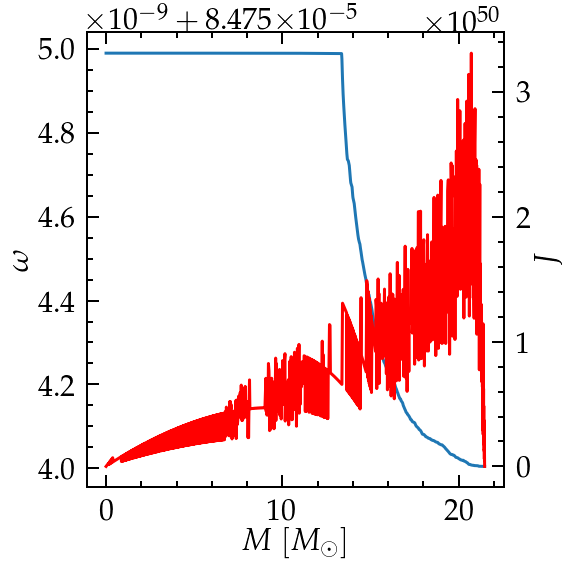

In [11]:
def internal_rotation_accretor(pfile):
    src, col = getSrcCol(pfile)
    mass = src[:, col.index("mass")]
    omega = src[:, col.index("omega")]
    radius = src[:, col.index("radius")]*Rsun_cm
    dm = src[:, col.index("dm")]
    J = radius*radius*omega*dm

    fig=plt.figure()
    ax=fig.add_subplot(111)
    bx = ax.twinx()
    
    ax.plot(mass, omega)
    bx.plot(mass, J, c='r')
    ax.set_xlabel(r"$M \ [M_\odot]$")
    ax.set_ylabel(r"$\omega$")
    bx.set_ylabel(r"$J$")
    # bx.set_yscale('log')

internal_rotation_accretor(root+"/LOGS2/"+getFinalProfileLOGS(root+"/LOGS2/"))

/mnt/home/mrenzo/RUNS/zeta_ophiuchi//caseA_Z0.01/P5days/binary_to_donor_Hedepl/


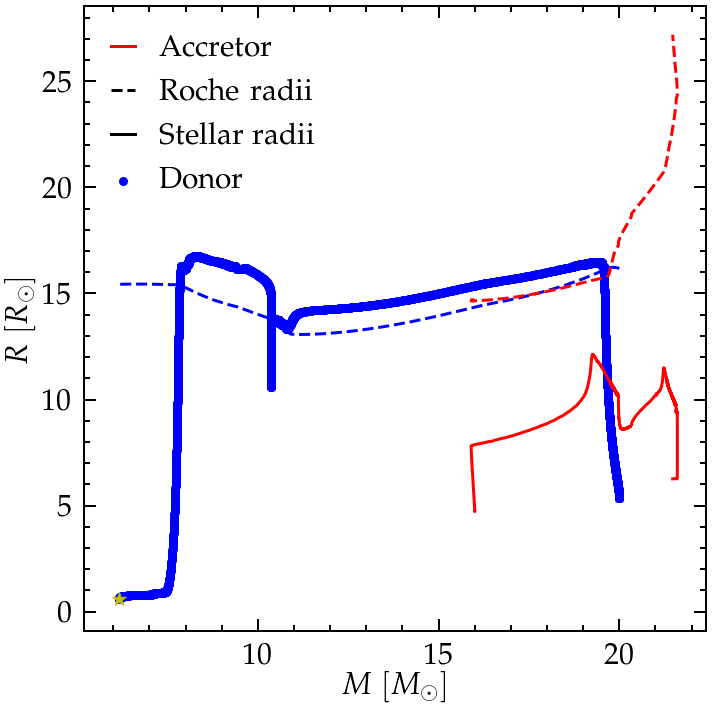

In [6]:
def radii_plot(folder, convert=False, figName=""):
    """ radii plot """
    print(colored(folder, "blue"))
    LOGS1 = folder+"/LOGS1/"
    LOGS2 = folder+"/LOGS2/"
    outfile = folder+'output'
    srcb, colb = getSrcCol(folder+'/binary_history.data', convert, convert)
    # print(colb)
    src1, col1 = getSrcCol(LOGS1+'/history.data', convert, convert)
    src2, col2 = getSrcCol(LOGS2+'/history.data', convert, convert)
    
    fig=plt.figure(figsize=(10, 10.))
    ax=fig.add_subplot(111)
    
    rl_1 = srcb[:, colb.index("rl_1")]
    rl_2 = srcb[:, colb.index("rl_2")]
    sep = srcb[:, colb.index("binary_separation")]
    
    m1b = srcb[:, colb.index("star_1_mass")]
    m2b = srcb[:, colb.index("star_2_mass")]
    
    m1 = src1[:, col1.index("star_mass")]
    m2 = src2[:, col2.index("star_mass")]
    r1 = 10**(src1[:, col1.index("log_R")])
    r2 = 10**(src2[:, col2.index("log_R")])
    ax.scatter(m1, r1, c='b', lw=3,label=r"$\mathrm{Donor}$")
    ax.scatter(m1[-1], r1[-1], c='y', marker="*", s=200)
    # ax.axhline(sep[-1],0,1)
    ax.plot(m1b, rl_1, c='b',lw=3, ls="--")
    ax.plot(m2, r2, c='r',lw=3, label=r"$\mathrm{Accretor}$")
    ax.plot(m2b, rl_2, c='r',lw=3, ls="--")
    ax.set_xlabel(r"$M \ [M_\odot]$", fontsize=30)
    ax.set_ylabel(r"$R \ [R_\odot]$", fontsize=30)
    ax.plot(np.nan, np.nan, lw=3, ls='--',c='k', label=r"$\mathrm{Roche\ radii}$")
    ax.plot(np.nan, np.nan, lw=3, ls='-',c='k', label=r"$\mathrm{Stellar\ radii}$")
    
    l = ax.legend(loc="best", fontsize=30, handlelength=0.8)
    if figName != "":
        plt.savefig(figName)


radii_plot(folder, convert=True)    

/mnt/home/mrenzo/RUNS/binaries_experiment/40_30_P70/
['model_number', 'num_zones', 'star_age', 'star_age_sec', 'log_dt', 'star_mass', 'log_xmstar', 'log_abs_mdot', 'mass_conv_core', 'mix_type_1', 'mix_qtop_1', 'mix_type_2', 'mix_qtop_2', 'mix_type_3', 'mix_qtop_3', 'mix_type_4', 'mix_qtop_4', 'mix_type_5', 'mix_qtop_5', 'mix_type_6', 'mix_qtop_6', 'mix_type_7', 'mix_qtop_7', 'mix_type_8', 'mix_qtop_8', 'mix_type_9', 'mix_qtop_9', 'mix_type_10', 'mix_qtop_10', 'mix_type_11', 'mix_qtop_11', 'mix_type_12', 'mix_qtop_12', 'mix_type_13', 'mix_qtop_13', 'mix_type_14', 'mix_qtop_14', 'mix_type_15', 'mix_qtop_15', 'mix_type_16', 'mix_qtop_16', 'mix_type_17', 'mix_qtop_17', 'mix_type_18', 'mix_qtop_18', 'mix_type_19', 'mix_qtop_19', 'mix_type_20', 'mix_qtop_20', 'burn_type_1', 'burn_qtop_1', 'burn_type_2', 'burn_qtop_2', 'burn_type_3', 'burn_qtop_3', 'burn_type_4', 'burn_qtop_4', 'burn_type_5', 'burn_qtop_5', 'burn_type_6', 'burn_qtop_6', 'burn_type_7', 'burn_qtop_7', 'burn_type_8', 'burn_qtop_

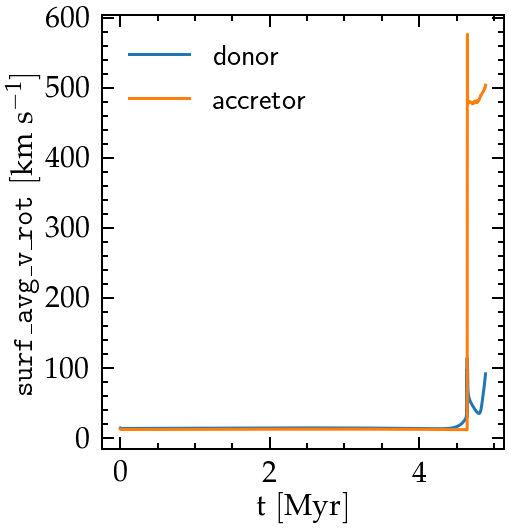

In [6]:
def plot_surf_rotation_vs_time(folder, convert=False):
    print(colored(folder, "blue"))    
    fig=plt.figure()
    gs = gridspec.GridSpec(100, 100)
    ax = fig.add_subplot(gs[:,:90])
    LOGS1 = folder+"/LOGS1/"
    LOGS2 = folder+"/LOGS2/"

    src1, col1 = getSrcCol(LOGS1+'/history.data', convert, convert)
    print(col1)
    src2, col2 = getSrcCol(LOGS2+'/history.data', convert, convert)
    v1 = src1[:, col1.index("surf_avg_v_rot")]
    t1 = src1[:, col1.index("star_age")]*1e-6
    v2 = src2[:, col2.index("surf_avg_v_rot")]
    t2 = src2[:, col2.index("star_age")]*1e-6

    ax.plot(t1, v1, label=r"donor")
    ax.plot(t2, v2, label=r"accretor")
    # ax.set_yscale('log')
    ax.legend()
    ax.set_xlabel(r"$\mathrm{t \ [Myr]}$")
    ax.set_ylabel(r"$\texttt{surf\_avg\_v\_rot} \ \mathrm{[km\ s^{-1}]}$")

    

plot_surf_rotation_vs_time(folder)

/mnt/home/mrenzo/RUNS/zeta_ophiuchi/fiducial/binary_to_donor_TAMS/


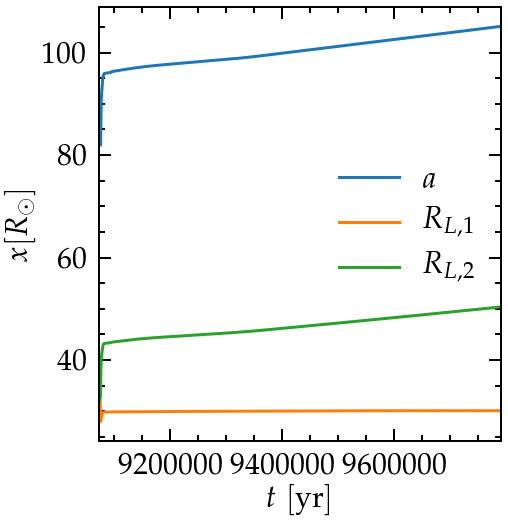

In [6]:
def separation_radii_evol(folder, fix_file=False, figName=""):
    print(colored(folder, "blue"))

    fig=plt.figure()
    gs = gridspec.GridSpec(100, 100)
    ax = fig.add_subplot(gs[:,:90])

    src, col = getSrcCol(folder+'/binary_history.data',clean=True, convert=fix_file)
    rl1 = src[:, col.index("rl_1")]
    rl2 = src[:, col.index("rl_2")]
    a = src[:, col.index("binary_separation")]
    t = src[:, col.index("age")]
    ax.set_xlabel(r"$t \ [\mathrm{yr}]$")
    # t = np.log10(t[-1]-t)
    # ax.set_xlabel(r"$\log_{10}(t_\mathrm{end}-t) \ [\mathrm{yr}]$")
    # ax.invert_xaxis()
    ax.plot(t,a, label=r"$a$")
    ax.plot(t,rl1, label=r"$R_{L,1}$")
    ax.plot(t,rl2, label=r"$R_{L,2}$")
    
    ax.set_ylabel(r"$x [R_\odot]$")
    ax.legend()

    rlgap = src[:, col.index("rl_relative_overflow_1")]
    ax.set_xlim(xmin=min(t[rlgap>0]), xmax=max(t))
    
# folder = "/mnt/home/mrenzo/RUNS/binaries_experiment/tryPabloEdit/binary_mesa/template_binary/"
separation_radii_evol(folder, fix_file=True)    


/mnt/home/mrenzo/RUNS/binaries_experiment/tryPabloEdit/binary_mesa/template_binary/
... Binary file does not yet exist
... let me scrub this for you
... done cleaning /mnt/home/mrenzo/RUNS/binaries_experiment/tryPabloEdit/binary_mesa/template_binary//binary_history.data


/mnt/home/mrenzo/anaconda3/envs/py3/lib/python3.7/site-packages/numpy/lib/function_base.py:1067: RuntimeWarning: divide by zero encountered in true_divide
  a = -(dx2)/(dx1 * (dx1 + dx2))
/mnt/home/mrenzo/anaconda3/envs/py3/lib/python3.7/site-packages/numpy/lib/function_base.py:1068: RuntimeWarning: divide by zero encountered in true_divide
  b = (dx2 - dx1) / (dx1 * dx2)
/mnt/home/mrenzo/anaconda3/envs/py3/lib/python3.7/site-packages/numpy/lib/function_base.py:1069: RuntimeWarning: divide by zero encountered in true_divide
  c = dx1 / (dx2 * (dx1 + dx2))
/mnt/home/mrenzo/anaconda3/envs/py3/lib/python3.7/site-packages/numpy/lib/function_base.py:1075: RuntimeWarning: invalid value encountered in add
  out[tuple(slice1)] = a * f[tuple(slice2)] + b * f[tuple(slice3)] + c * f[tuple(slice4)]
/mnt/home/mrenzo/anaconda3/envs/py3/lib/python3.7/site-packages/IPython/core/events.py:88: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes

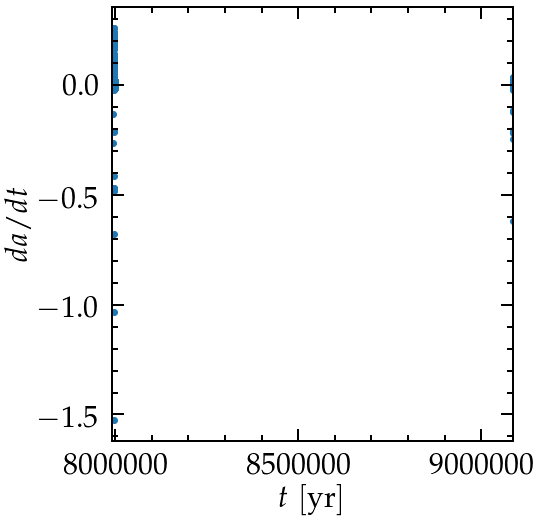

In [60]:
# dadt
def dadt(folder, fix_file=False, figName=""):
    print(colored(folder, "blue"))

    fig=plt.figure()
    gs = gridspec.GridSpec(100, 100)
    ax = fig.add_subplot(gs[:,:90])

    src, col = getSrcCol(folder+'/binary_history.data',clean=True, convert=fix_file)
    a = src[:, col.index("binary_separation")]
    t = src[:, col.index("age")]
    dadt = np.gradient(a,t)
    # ddaddt = np.gradient(dadt,t)
    ax.scatter(t,dadt)
    # ax.scatter(t,ddaddt)
    rlgap = src[:, col.index("rl_relative_overflow_1")]
    ax.set_xlim(xmin=min(t[rlgap>0]), xmax=max(t))
    ax.set_ylabel(r"$da / dt$")
    ax.set_xlabel(r"$t \ [\mathrm{yr}]$")
    # ax.set_ylim(-0.005)
dadt(folder)    

/mnt/home/mrenzo/RUNS/mesa_develop_testing/post_adam_fix/


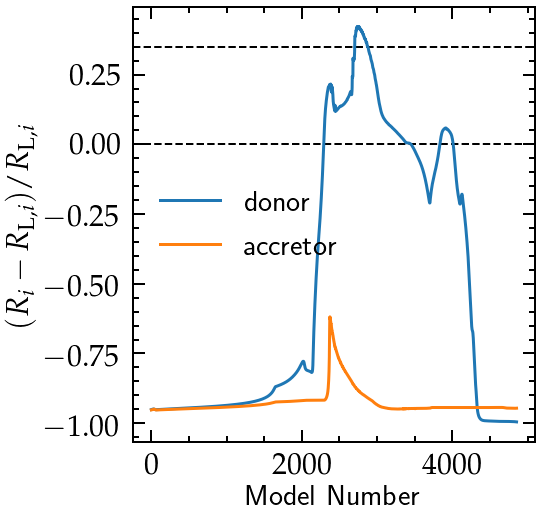

In [10]:
def RocheLobe_relativeGap(folder, fix_file=False, figName=""):
    print(colored(folder, "blue"))

    fig=plt.figure()
    gs = gridspec.GridSpec(100, 100)
    ax = fig.add_subplot(gs[:,:90])

    src, col = getSrcCol(folder+'/binary_history.data',clean=True, convert=fix_file)
    rl1 = src[:, col.index("rl_relative_overflow_1")]
    rl2 = src[:, col.index("rl_relative_overflow_2")]

    # t= src[:, col.index("age")]
    # t = np.log10(t[-1]-t)
    # ax.invert_xaxis()
    # ax.plot(t, rl1, label=r"donor")
    # ax.plot(t, rl2, label=r"accretor")
    # ax.set_xlabel(r"$\log_{10}(t_\mathrm{end}-t \ [\mathrm{yr}])$")
    
    mn = src[:, col.index("model_number")]
    ax.plot(mn, rl1, label=r"donor")
    ax.plot(mn, rl2, label=r"accretor")
    # ax.set_xlim(4000,4250)    
    ax.set_xlabel(r"Model Number")
    ax.legend()
    ax.axhline(0,0,1,lw=2, ls='--', zorder=0, c='k')
    ax.axhline(0.35,0,1,lw=2, ls='--', zorder=0, c='k')


    ax.set_ylabel(r"$(R_i-R_{\mathrm{L},i})/R_{\mathrm{L},i}$")
    
    
# folder = "/mnt/home/mrenzo/ceph/RUNS/binary_experiments/"
# folder = "/mnt/home/mrenzo/RUNS/binaries_experiment/rlof_conv/"
RocheLobe_relativeGap(folder)

/mnt/home/mrenzo/RUNS/zeta_ophiuchi//caseA_Z0.01/P5days/binary_to_donor_Hedepl/


/mnt/home/mrenzo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:68: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations


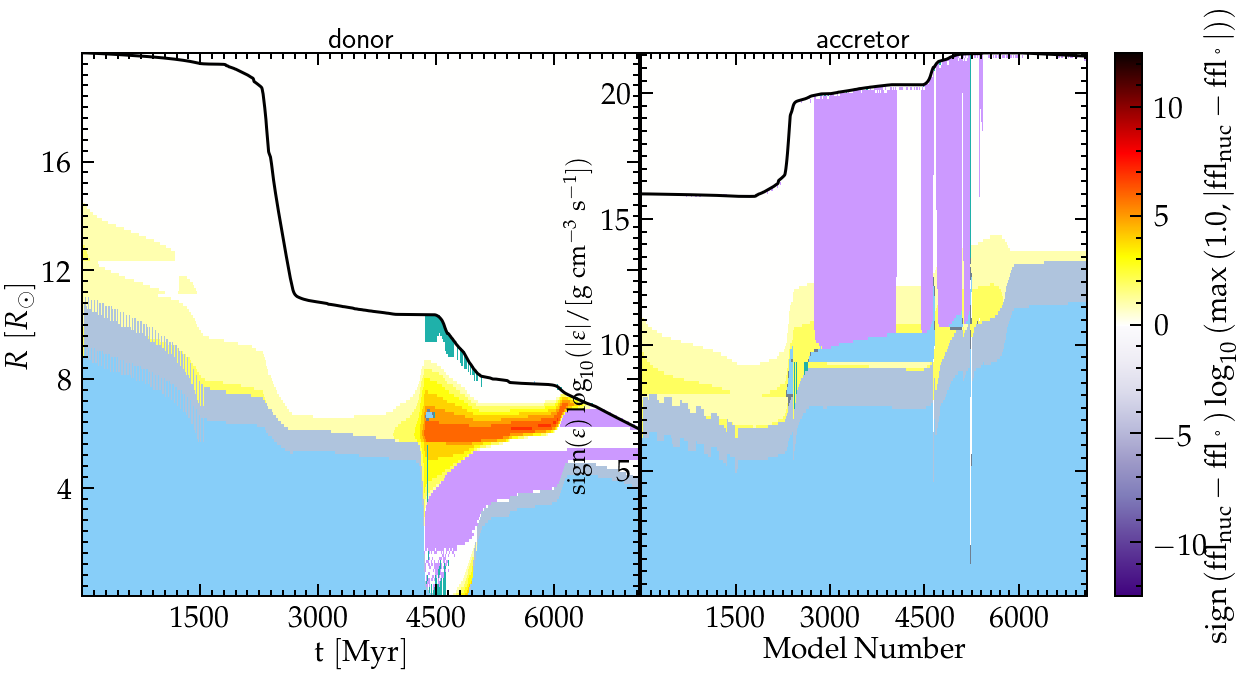

In [8]:
# Kippenhahn diagram
def mkKipp(f, yaxis="mass"): #yaxis can also be "radius"
    print(colored(f,"blue"))
    fig = plt.figure(figsize=(20., 10.))
    gs = gridspec.GridSpec(100, 100)
    ax = fig.add_subplot(gs[:,:50])
    bx = fig.add_subplot(gs[:,50:])
    # donor star
    f1 = f+'/LOGS1/'
    mmm.loadHistory(f=f1)
    src, col = getSrcCol(f1+'/history.data', clean=False, convert=False)
    time = src[:, col.index("star_age")]
    modnum = src[:, col.index("model_number")]
    minmod = 0
    maxmod = max(modnum)
    ppp.plotKip3(mmm, fig=fig, ax=ax,
                 # mod_min=minmod, mod_max=maxmod,
                 xaxis='model_number',
                 yaxis=yaxis,
                 # xaxis='star_age',
                 reloadHistory=False,
                 show_mass_loc=False,
                 show_mix_labels=False,
                 show=False,
                 mix_alpha=1,
                 # mix_hatch='//', hatch_color='#98ef56', 
                 # age_lookback=True,
                 # age_log=True,
                 colorbar=False, # one cb is enough
                 zone_frac = 10, #0.2,
                 # end_time = mmm.hist.star_age[maxmod],
                 # age_reverse=True,
                 cmin=-12.5, cmax=12.5)
    ax.set_title(r"donor", size=30)
    # accretor star
    f2 = f+'/LOGS2/'
    mmm.loadHistory(f=f2)
    src, col = getSrcCol(f2+'/history.data', clean=False, convert=False)
    time = src[:, col.index("star_age")]
    modnum = src[:, col.index("model_number")]
    minmod = 0
    maxmod = max(modnum)
    ppp.plotKip3(mmm, fig=fig, ax=bx,
                 # mod_min=minmod, mod_max=maxmod,
                 xaxis='model_number',
                 yaxis=yaxis,
                 # xaxis='star_age',
                 reloadHistory=False,
                 show_mass_loc=False,
                 show_mix_labels=False,
                 show=False,
                 mix_alpha=1,
                 # mix_hatch='//', hatch_color='#98ef56', 
                 # age_lookback=True,
                 # age_log=True,
                 zone_frac = 10, #0.2,
                 # end_time = mmm.hist.star_age[maxmod],
                 # age_reverse=True,
                 cmin=-12.5, cmax=12.5)
    bx.set_title(r"accretor", size=30)    
    cbar_label = r"$\mathrm{sign}(\varepsilon)\log_{10}(|\varepsilon|/\mathrm{[g\ cm^{-3}\ s^{-1}]})$"
    cbar = fig.axes[1]
    cbar.set_ylabel(cbar_label, fontsize=25)

    ax.set_xlabel(r"$\mathrm{t \ [Myr]}$", fontsize=30)
    #ax.set_ylabel(r"$M \ [M_\odot]$", fontsize=30)
    ax.set_ylabel(r"$R \ [R_\odot]$", fontsize=30)
    plt.tight_layout()

# test
mkKipp(folder)

/mnt/home/mrenzo/RUNS/zeta_ophiuchi//caseA_Z0.01/P5days/binary_to_donor_Hedepl/
['model_number', 'num_zones', 'star_age', 'star_age_sec', 'log_dt', 'star_mass', 'log_xmstar', 'log_abs_mdot', 'mass_conv_core', 'mix_type_1', 'mix_qtop_1', 'mix_type_2', 'mix_qtop_2', 'mix_type_3', 'mix_qtop_3', 'mix_type_4', 'mix_qtop_4', 'mix_type_5', 'mix_qtop_5', 'mix_type_6', 'mix_qtop_6', 'mix_type_7', 'mix_qtop_7', 'mix_type_8', 'mix_qtop_8', 'mix_type_9', 'mix_qtop_9', 'mix_type_10', 'mix_qtop_10', 'mix_type_11', 'mix_qtop_11', 'mix_type_12', 'mix_qtop_12', 'mix_type_13', 'mix_qtop_13', 'mix_type_14', 'mix_qtop_14', 'mix_type_15', 'mix_qtop_15', 'mix_type_16', 'mix_qtop_16', 'mix_type_17', 'mix_qtop_17', 'mix_type_18', 'mix_qtop_18', 'mix_type_19', 'mix_qtop_19', 'mix_type_20', 'mix_qtop_20', 'burn_type_1', 'burn_qtop_1', 'burn_type_2', 'burn_qtop_2', 'burn_type_3', 'burn_qtop_3', 'burn_type_4', 'burn_qtop_4', 'burn_type_5', 'burn_qtop_5', 'burn_type_6', 'burn_qtop_6', 'burn_type_7', 'burn_qtop_7',

/mnt/home/mrenzo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log10
  # This is added back by InteractiveShellApp.init_path()


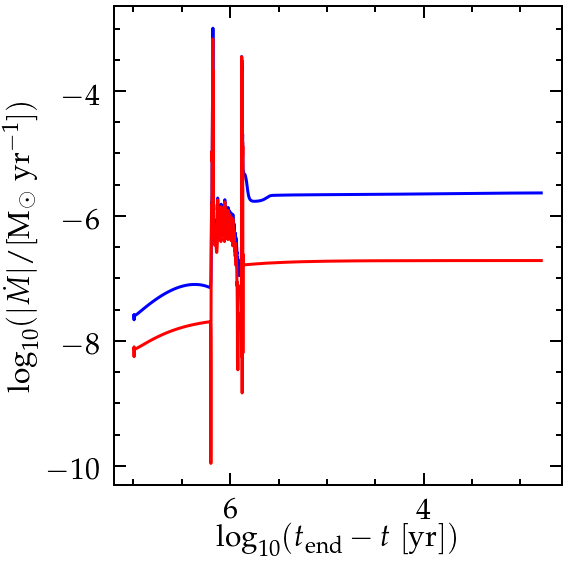

In [9]:
## plot mass loss history
def plotMdot(hfile, color='b', ax="", revert=False):
    if ax == "":
        fig=plt.figure(figsize=(10, 10.))
        ax=fig.add_subplot(111)

    src, col = getSrcCol(hfile)
    print(col)    
    t = src[:, col.index("star_age")]
    if revert:
        t = np.log10(t[-1]-t)
    mdot = src[:, col.index("log_abs_mdot")]        
    ax.plot(t, mdot, c=color, lw=3, label=r"$\dot{M}$")
    # ax.set_xlim(xmin=2700000)

def plotMdotBinary(folder, revert=False):
    print(folder)    
    # set up fig
    fig=plt.figure()
    ax=fig.add_subplot(111)

    # donor
    hfile1=folder+"LOGS1/history.data"    
    c1 = 'b'
    plotMdot(hfile1, c1, ax, revert)
    #accretor
    hfile2=folder+"LOGS2/history.data"    
    c2 = 'r'
    plotMdot(hfile2, c2, ax, revert)

    ax.set_xlabel(r"$\mathrm{time \ [yr]}$", size=30)
    ax.set_ylabel(r"$\log_{10}(|\dot{M}|/\mathrm{[M_\odot \ yr^{-1}]})$", size=30)
    if revert:
        ax.invert_xaxis()
        ax.set_xlabel(r"$\log_{10}(t_\mathrm{end}-t \ [\mathrm{yr}])$", size=30)
        # plt.savefig('/mnt/home/mrenzo/TMP/MESA_binary/10_8.8_P10/mdot_history.pdf')    
        
# test
# folder += "/Kolb/" #"/mnt/home/mrenzo/RUNS/simple_binary/10_8.8/"
# folder = "/mnt/home/mrenzo/ceph/RESULTS/binary_P100_q0.8_Z0.02/16.0_12.8_P100/"
plotMdotBinary(folder, True)


... Binary file does not yet exist


/mnt/home/mrenzo/anaconda3/envs/py3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log10
  # This is added back by InteractiveShellApp.init_path()


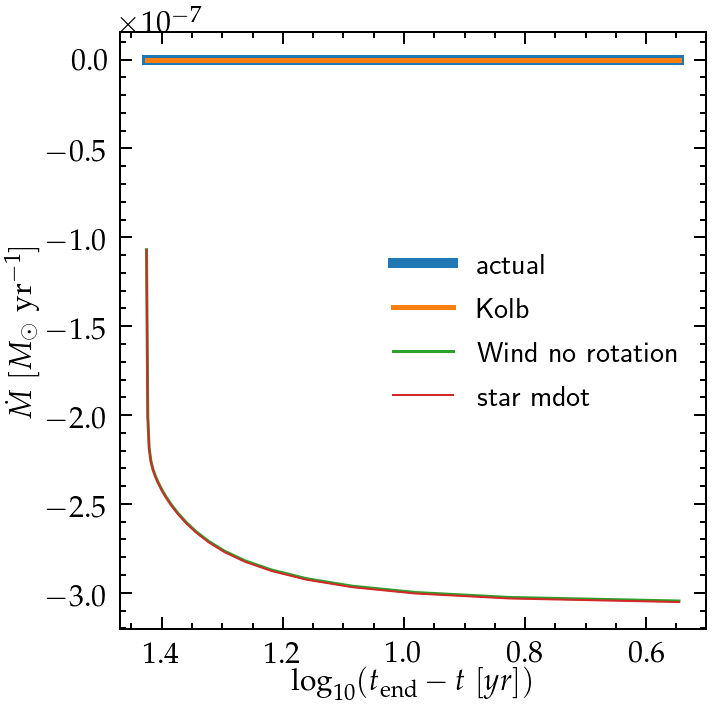

In [27]:
def checkMTdonor(hfile, convert=False):
    fig=plt.figure(figsize=(10, 10.))
    ax=fig.add_subplot(111)    
    src, col = getSrcCol(hfile, convert, convert)
    kolb = src[:, col.index('Kolb_mdot')]
    actual = src[:, col.index('actual_mdot')]
    wind_no_rot = src[:, col.index('mdot_wind_no_rot')]
    star_mdot = src[:, col.index("star_mdot")]
    mdot = 10**(src[:, col.index('log_abs_mdot')])
    t = src[:, col.index('star_age')]
    t = np.log10(t[-1]-t)
    ax.invert_xaxis()
    # ax.plot(t, mdot, lw=5, label=r"mdot")
    ax.plot(t, actual, lw=10, label=r"actual")
    ax.plot(t, kolb, lw=5, label=r"Kolb")
    ax.plot(t, wind_no_rot,lw=3, label=r"Wind no rotation")
    ax.plot(t, star_mdot,lw=2, label=r"star mdot")
    
    ax.set_xlabel(r"$\log_{10}(t_\mathrm{end} -t \ [yr])$")
    ax.set_ylabel(r"$\dot{M}\ [M_\odot\ \mathrm{yr^{-1}}]$")
    ax.legend()
checkMTdonor(folder+'LOGS1/history.data', False)

In [ ]:
## surface opacities
def surf_opacities(folder, convert=False, figName=""):
    print(folder)
    LOGS1 = folder+"/LOGS1/"
    LOGS2 = folder+"/LOGS2/"
    fig = plt.figure(figsize=(20,10))
    gs = gridspec.GridSpec(120, 100)
    ax = fig.add_subplot(gs[:,:30])
    bx = fig.add_subplot(gs[:,40:65])
    cx = fig.add_subplot(gs[:,75:])

    #donor star
    src, col = getSrcCol(LOGS1+'/history.data')
    t1 = src[:, col.index("star_age")]
    t1 = np.log10(t1[-1]-t1)
    r1 = 10.0**(src[:, col.index("log_R")])
    k1 = src[:, col.index("photosphere_opacity")]    
    ax.plot(t1, k1, 'b', label=r"donor")
    bx.plot(t1, r1, c='b')
    cx.plot(k1,r1,  c='b')
    #accretor star
    src, col = getSrcCol(LOGS2+'/history.data')
    t2 = src[:, col.index("star_age")]
    t2 = np.log10(t2[-1]-t2)
    k2 = src[:, col.index("photosphere_opacity")]
    r2 = 10.0**(src[:, col.index("log_R")])
    ax.plot(t2, k2, 'r', label=r"acretor")
    bx.plot(t2, r2, c='r')
    cx.plot(k2,r2, c='r')

    
    ax.legend()
    ax.set_ylabel(r"$\kappa_\mathrm{surf}$")
    cx.set_xlabel(r"$\kappa_\mathrm{surf}$")
    ax.set_yscale('log')
    bx.set_ylabel(r"$R \ [R_\odot]$")
    cx.set_ylabel(r"$R \ [R_\odot]$")
    # ax.set_xlabel(r"$\mathrm{time\ [Myr]}$")
    ax.set_xlabel(r"$\log_{10}\{(t_\mathrm{end}-t)/\mathrm{[yr]}\}$")
    bx.set_xlabel(r"$\log_{10}\{(t_\mathrm{end}-t)/\mathrm{[yr]}\}$")

    ax.invert_xaxis()
    bx.invert_xaxis()

    
surf_opacities("/mnt/home/mrenzo/ceph/RESULTS/binary_P100_q0.8_Z0.02/16.0_12.8_P100/")

In [10]:
## timescale ratios
def timescales_plot(folder, convert=False, figName=""):
    print(folder)
    LOGS1 = folder+"/LOGS1/"
    LOGS2 = folder+"/LOGS2/"

    #donor star
    src, col = getSrcCol(LOGS1+'/history.data')
    print(col)
    t_kh1 = src[:, col.index("kh_timescale")]
    t_mdot1 = src[:, col.index("mdot_timescale")]
    t1 = src[:, col.index("star_age")]*1e-6
    ratio1 = t_kh1/t_mdot1

    #accretor star
    src, col = getSrcCol(LOGS2+'/history.data')
    # print(col)
    t_kh2 = src[:, col.index("kh_timescale")]
    t_mdot2 = src[:, col.index("mdot_timescale")]
    t2 = src[:, col.index("star_age")]*1e-6
    ratio2 = t_kh2/t_mdot2

    fig=plt.figure(figsize=(10, 10.))
    ax=fig.add_subplot(111)
    ax.plot(t1, ratio1, 'b', label=r'donor')
    ax.plot(t2, ratio2, 'r', label=r'accretor')
    ax.set_ylabel(r"$\tau_\mathrm{KH}/\tau_{\dot{M}}$")
    ax.set_xlabel(r"$\mathrm{time \ [Myr]}$")

timescales_plot("/mnt/home/mrenzo/ceph/RESULTS/binary_P100_q0.8_Z0.02/16.0_12.8_P100/")

/mnt/home/mrenzo/ceph/RESULTS/binary_P100_q0.8_Z0.02/16.0_12.8_P100/


FileNotFoundError: [Errno 2] No such file or directory: '/mnt/home/mrenzo/ceph/RESULTS/binary_P100_q0.8_Z0.02/16.0_12.8_P100//LOGS1//history.data'

In [ ]:
## masses in time
def MassVelocityEvolution(folder, convert=False, figName=""):
    print(folder)
    fig = plt.figure(figsize=(15,9))
    gs = gridspec.GridSpec(200, 100)
    ax = fig.add_subplot(gs[:100,:])
    bx = fig.add_subplot(gs[100:200,:])
    bbx = bx.twinx()
    
    srcb, colb = getSrcCol(folder+'/binary_history.data', convert, convert)
    t = srcb[:, colb.index("age")]*1e-6
    M1 = srcb[:, colb.index("star_1_mass")]
    M2 = srcb[:, colb.index("star_2_mass")]
    v2 = srcb[:, colb.index("v_orb_2")]
    P = srcb[:, colb.index("period_days")]
    
    ax.plot(t, M2, c='r', label=r"$M_2$")
    ax.plot(t, M1, c='b', label=r"$M_1$")
    ax.plot(t, M1+M2, c="k", label=r"$M_1+M_2$")

    ax.text(t[-1]+0.1, M2[-1], r"$M_2="+f"{M2[-1]:.1f}"+r"$", fontsize=30)
    ax.text(t[-1]+0.1, M1[-1], r"$M_1="+f"{M1[-1]:.1f}"+r"$", fontsize=30)
    ax.text(t[-1]+0.1, M1[-1]+M2[-1], r"$M_1+M_2="+f"{M1[-1]+M2[-1]:.1f}"+r"$", fontsize=30)
    
    
    bx.plot(t,v2, ls='-', lw=3, c='r')
    bx.text(t[-1]+0.1, v2[-1], f"{v2[-1]:.1f}", fontsize=30)
    bbx.plot(t, P, ls='--', lw=3, c='b')

    ax.set_ylim(0,37)
    ax.set_xlim(0,15)
    ax.set_xticklabels([])
    bx.set_xlim(ax.get_xlim())
    # bbx.set_ylim(90,700)
    bx.set_xlabel(r"$\mathrm{t \ [Myr]}$")
    ax.set_ylabel(r"$M \ [M_\odot]$")
    bx.set_ylabel(r"$v_2 \ [\mathrm{km\ s^{-1}}]$")
    bbx.set_ylabel(r"$P \ \mathrm{[days]}$", color="b")

# test
folder="/mnt/home/mrenzo/RUNS/zeta_ophiuchi//Z0.001/binary_to_donor_Hedepl/"    
MassVelocityEvolution(folder, convert=True, figName="")

/mnt/home/mrenzo/anaconda3/envs/py3/lib/python3.7/site-packages/IPython/core/events.py:88: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  func(*args, **kwargs)
/mnt/home/mrenzo/anaconda3/envs/py3/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  fig.canvas.print_figure(bytes_io, **kw)


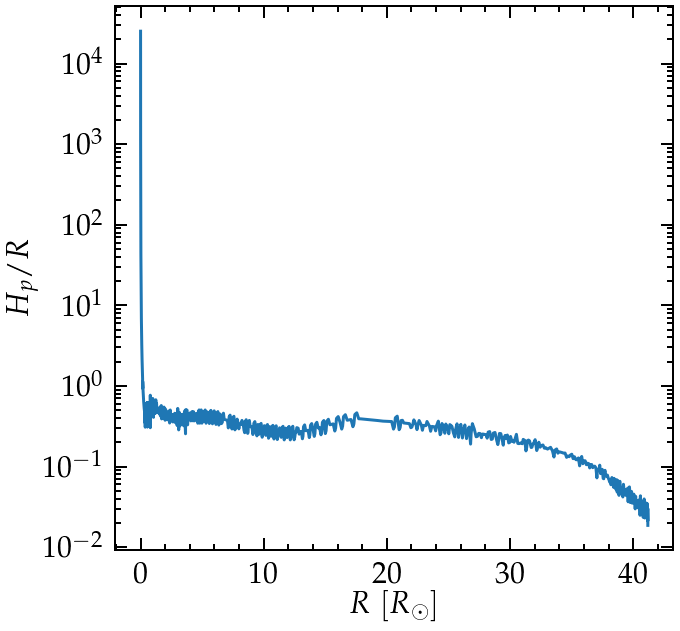

In [31]:
def getPscaleHeight(radius, logP):
    hp = - np.gradient(radius,logP)
    return hp


def Hp_div_R(pfile):
    fig=plt.figure(figsize=(10, 10.))
    gs = gridspec.GridSpec(100, 100)
    ax=fig.add_subplot(gs[:,:])
    src, col = getSrcCol(pfile)
    radius = src[:, col.index('radius')]
    logP = src[:, col.index('logP')]
    hp = getPscaleHeight(radius, logP)

    ax.plot(radius, hp/radius)
    ax.set_xlabel(r"$R \ [R_\odot]$")
    ax.set_ylabel(r"$H_p/R$")
    ax.set_yscale('log')
pfile = folder+'LOGS1/'+getFinalProfileLOGS(folder+"LOGS1/")
Hp_div_R(pfile)

/mnt/home/mrenzo/anaconda3/envs/py3/lib/python3.7/site-packages/ipykernel_launcher.py:72: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
/mnt/home/mrenzo/anaconda3/envs/py3/lib/python3.7/site-packages/IPython/core/events.py:88: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  func(*args, **kwargs)
/mnt/home/mrenzo/anaconda3/envs/py3/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  fig.canvas.print_figure(bytes_io, **kw)


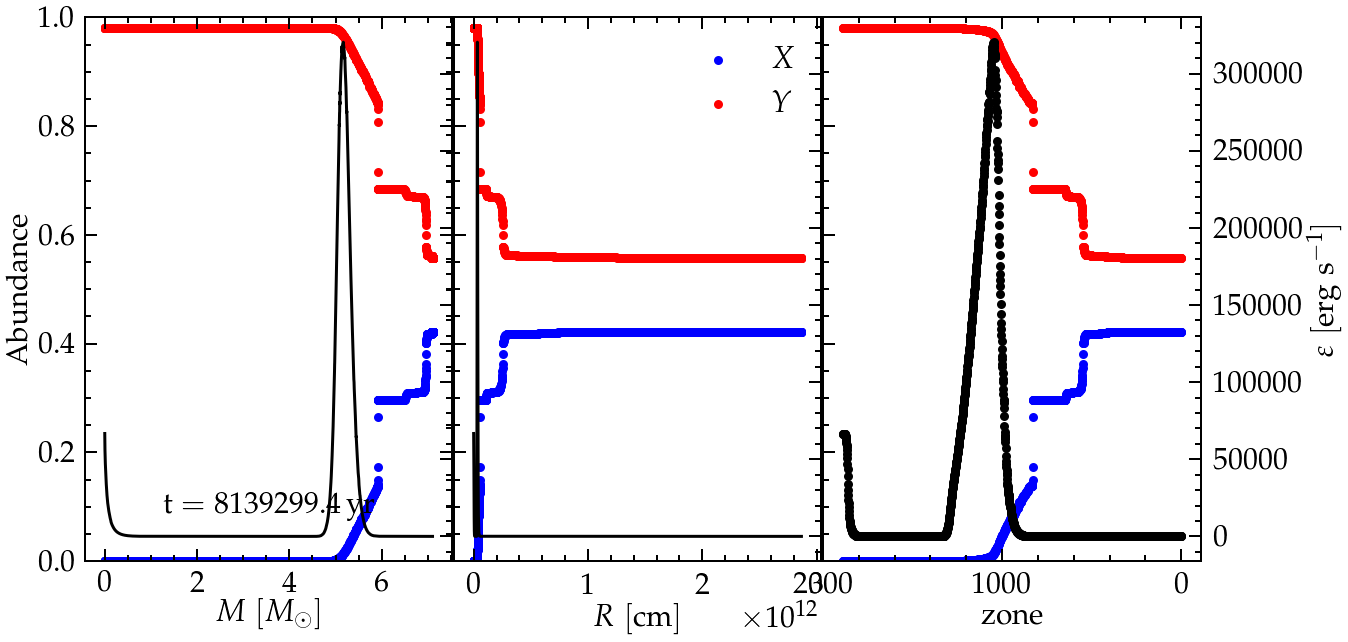

In [34]:
def mkXYprofile(pfile):
    fig=plt.figure(figsize=(20, 10.))
    gs = gridspec.GridSpec(100, 100)
    ax=fig.add_subplot(gs[:,:33])
    ax2 = ax.twinx()
    bx=fig.add_subplot(gs[:,33:66])
    bx2 = bx.twinx()
    cx=fig.add_subplot(gs[:,66:])
    cx2 = cx.twinx()
    src, col = getSrcCol(pfile)
    m = src[:, col.index("mass")]
    r = 10**(src[:, col.index("logR")])*Rsun_cm
    z = src[:, col.index("zone")]
    X = src[:, col.index("h1")]
    Y = src[:, col.index("he4")]
    # logT = src[:, col.index("logT")]
    #     eps  = src[:, col.index("eps_nuc")]
    # print(col)
    eps =  src[:, col.index("eps_nuc")]-src[:, col.index("non_nuc_neu")]

    with open(pfile,'r') as F:
        for i, line in enumerate(F):
            if i ==1:
                head_col = line.split()
            if i ==2:
                data = line.split()
                break
        age = float(data[head_col.index("star_age")])
    
    ax.scatter(m, X, c='b',lw=3, ls='-', label=r"$X$")
    ax.scatter(m, Y, c='r',lw=3, ls='-', label=r"$Y$")
    ax2.plot(m, eps, c='k',lw=3, ls='-')

    
    bx.scatter(r, X, c='b',lw=3, ls='-', label=r"$X$")
    bx.scatter(r, Y, c='r',lw=3, ls='-', label=r"$Y$")
    bx2.plot(r, eps, c='k',lw=3, ls='-')


    cx.scatter(z, X, c='b',lw=3, ls='-', label=r"$X$")
    cx.scatter(z, Y, c='r',lw=3, ls='-', label=r"$Y$")

    cx2.scatter(z, eps, c='k',lw=3, ls='-')
    cx2.set_ylabel(r"$\varepsilon \ \mathrm{[erg \ s^{-1}]}$")
    cx.invert_xaxis()
    # cx2.plot(z, logT, c='k',lw=3, ls='-', label=r"$T$")
    # cx2.set_ylabel(r"$\log_{10}(T/ \mathrm{[K]})$")

    # cx2.set_ylim(7,8)
    ax.set_xlabel(r"$M \ [M_\odot]$", fontsize=30)
    bx.set_xlabel(r"$R \ [\mathrm{cm}]$", fontsize=30)
    cx.set_xlabel(r"$\mathrm{zone}$", fontsize=30)
    
    ax.set_ylabel(r"$\mathrm{Abundance}$", fontsize=30)
    ax.tick_params(axis='both', which='major', width=2, length=12, pad=10, labelsize=30, direction='in', top="on", right="on")
    ax.tick_params(axis='both', which='minor', width=2, length=6, pad=10, direction='in', top="on", right="on")
    l = bx.legend(loc="upper right", fontsize=30)

    ax.set_ylim(0,1)
    bx.set_ylim(ax.get_ylim())
    cx.set_ylim(ax.get_ylim())
    bx.set_yticklabels([])
    cx.set_yticklabels([])
    # cx.axvline(6200,0,1,ls='-',lw=2)
    # cx.set_xlim(6000,6500)
    # ax.set_xlim(0,max(m)+1)
    # ax.yaxis.set_major_locator(MultipleLocator(0.2))
    # ax.yaxis.set_minor_locator(MultipleLocator(0.1))
    # ax.xaxis.set_major_locator(MultipleLocator(5))
    # ax.xaxis.set_minor_locator(MultipleLocator(2.5))
    ax.text(0.5,0.1, r"$\mathrm{t}=%.1f\,\mathrm{yr}$"%float(age), fontsize=30, va="center", ha="center", transform=ax.transAxes)
    plt.tight_layout()
    # outfname="%.1f"%float(age)+"abundance.png"
    # plt.savefig("/mnt/home/mrenzo/TMP/"+outfname)


# folder = "/mnt/home/mrenzo/RUNS/simple_binary/"
pfile = folder+'LOGS1/'+getFinalProfileLOGS(folder+"LOGS1/")
mkXYprofile(pfile)


# pfiles = glob.glob(folder+'/LOGS2/profile*.data')
# for pfile in pfiles:
#     mkXYprofile(pfile)
    

/mnt/home/mrenzo/anaconda3/envs/py3/lib/python3.7/site-packages/ipykernel_launcher.py:70: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
/mnt/home/mrenzo/anaconda3/envs/py3/lib/python3.7/site-packages/IPython/core/events.py:88: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  func(*args, **kwargs)
/mnt/home/mrenzo/anaconda3/envs/py3/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  fig.canvas.print_figure(bytes_io, **kw)


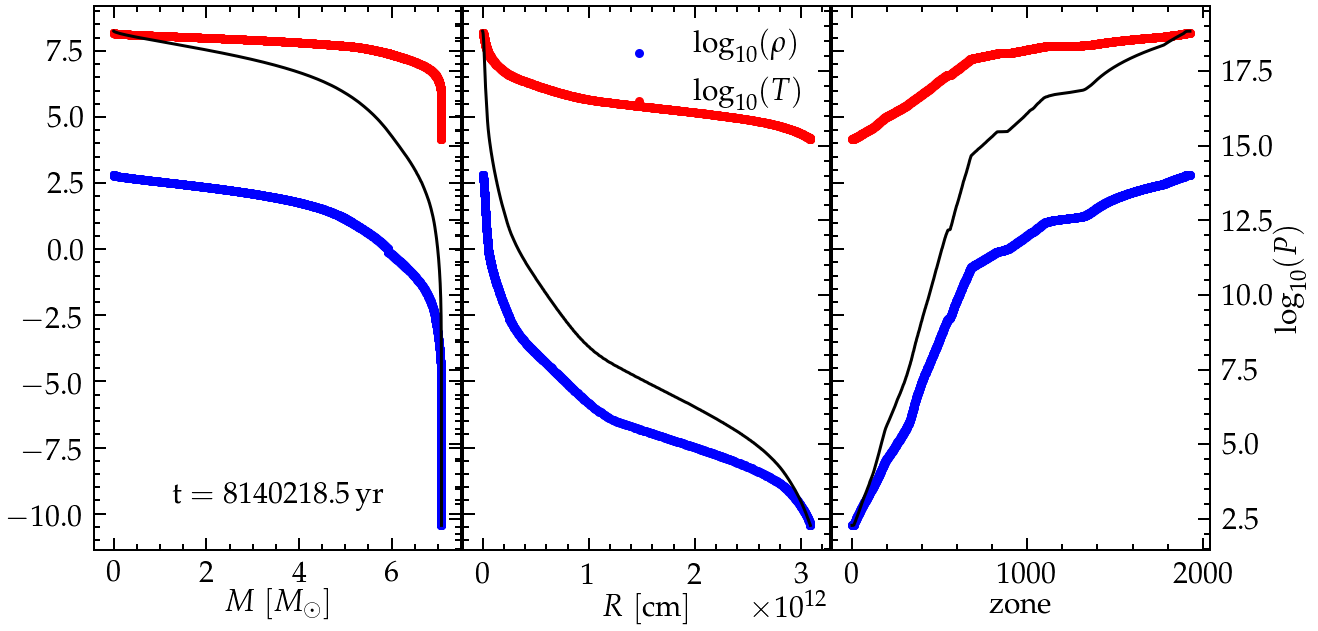

In [25]:
## density profile
def PTRho_profile(pfile):
    fig=plt.figure(figsize=(20, 10.))
    gs = gridspec.GridSpec(100, 100)
    ax=fig.add_subplot(gs[:,:33])
    ax2 = ax.twinx()
    bx=fig.add_subplot(gs[:,33:66])
    bx2 = bx.twinx()
    cx=fig.add_subplot(gs[:,66:])
    cx2 = cx.twinx()
    src, col = getSrcCol(pfile)
    m = src[:, col.index("mass")]
    r = 10**(src[:, col.index("logR")])*Rsun_cm
    z = src[:, col.index("zone")]
    logT = src[:, col.index("logT")]
    logRho = src[:, col.index("logRho")]
    logP  = src[:, col.index("logP")]
    
    with open(pfile,'r') as F:
        for i, line in enumerate(F):
            if i ==1:
                head_col = line.split()
            if i ==2:
                data = line.split()
                break
        age = float(data[head_col.index("star_age")])
    
    ax.scatter(m, logRho, c='b',lw=3, ls='-', label=r"$\log_{10}(\rho)$") 
    ax.scatter(m, logT, c='r',lw=3, ls='-',   label=r"$\log_{10}(T)$")   
    ax2.plot(m, logP, c='k',lw=3, ls='-')

    
    bx.scatter(r, logRho, c='b',lw=3, ls='-', label=r"$\log_{10}(\rho)$")
    bx.scatter(r, logT, c='r',lw=3, ls='-',   label=r"$\log_{10}(T)$")    
    bx2.plot(r, logP, c='k',lw=3, ls='-')


    cx.scatter(z, logRho, c='b',lw=3, ls='-', label=r"$logRho$")
    cx.scatter(z, logT, c='r',lw=3, ls='-', label=r"$logT$")

    cx2.plot(z, logP, c='k',lw=3, ls='-')
    cx2.set_ylabel(r"$\log_{10}(P)$")

    # cx2.plot(z, logT, c='k',lw=3, ls='-', label=r"$T$")
    # cx2.set_ylabel(r"$\log_{10}(T/ \mathrm{[K]})$")

    # cx2.set_ylim(7,8)
    ax.set_xlabel(r"$M \ [M_\odot]$", fontsize=30)
    bx.set_xlabel(r"$R \ [\mathrm{cm}]$", fontsize=30)
    cx.set_xlabel(r"$\mathrm{zone}$", fontsize=30)
    
    # ax.set_ylabel(r"$\mathrm{Abundance}$", fontsize=30)
    ax.tick_params(axis='both', which='major', width=2, length=12, pad=10, labelsize=30, direction='in', top="on", right="on")
    ax.tick_params(axis='both', which='minor', width=2, length=6, pad=10, direction='in', top="on", right="on")
    l = bx.legend(loc="upper right", fontsize=30)

    # ax.set_ylim(0,1)
    # bx.set_ylim(ax.get_ylim())
    # cx.set_ylim(ax.get_ylim())
    bx.set_yticklabels([])
    cx.set_yticklabels([])
    # cx.axvline(6200,0,1,ls='-',lw=2)
    # cx.set_xlim(6000,6500)
    # ax.set_xlim(0,max(m)+1)
    # ax.yaxis.set_major_locator(MultipleLocator(0.2))
    # ax.yaxis.set_minor_locator(MultipleLocator(0.1))
    # ax.xaxis.set_major_locator(MultipleLocator(5))
    # ax.xaxis.set_minor_locator(MultipleLocator(2.5))
    ax.text(0.5,0.1, r"$\mathrm{t}=%.1f\,\mathrm{yr}$"%float(age), fontsize=30, va="center", ha="center", transform=ax.transAxes)
    plt.tight_layout()
    # outfname="%.1f"%float(age)+"abundance.png"
    # plt.savefig("/mnt/home/mrenzo/TMP/"+outfname)

pfile = folder+'LOGS1/'+getFinalProfileLOGS(folder+"LOGS1/")
PTRho_profile(pfile)


/mnt/home/mrenzo/RUNS/binaries_experiment/tryPabloEdit/binary_mesa/template_binary/
... Binary file does not yet exist
... Binary file does not yet exist


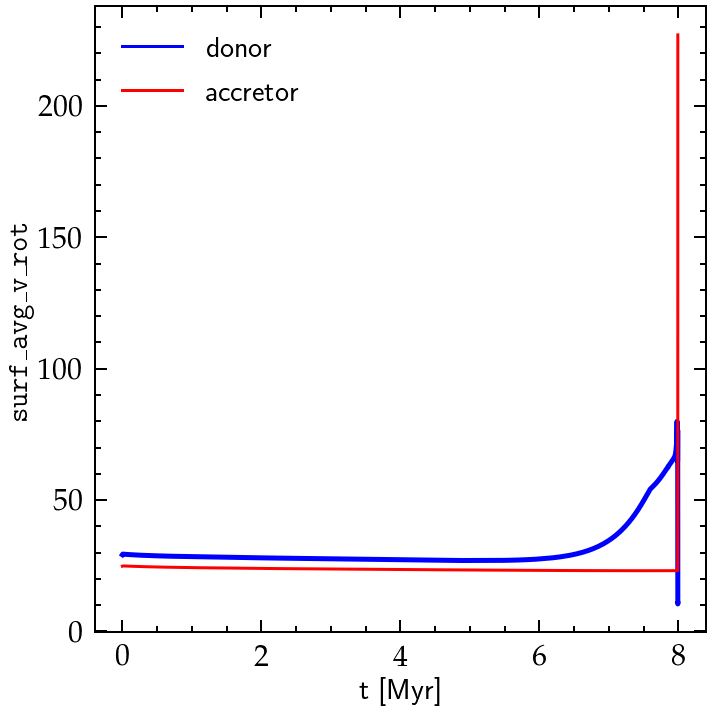

In [4]:
# rotation rate
def plot_veq(hfile, color="b", ax="", lw=3):
    if ax == "":
        # f not provided, make one
        fig=plt.figure(figsize=(10, 10.))
        ax=fig.add_subplot(111)
    src, col = getSrcCol(hfile, False, False)
    # print(col)    
    time = src[:, col.index("star_age")]*1e-6
    veq = src[:, col.index("surf_avg_v_rot")] #km/s
    ax.plot(time, veq, c=color, lw=lw)

def veq_evol_both(folder):
    print(folder)
    hfile1 = folder+"/LOGS1/history.data"
    hfile2 = folder+"/LOGS2/history.data"

    fig=plt.figure(figsize=(10, 10.))
    ax=fig.add_subplot(111)
    plot_veq(hfile1, color="b", ax=ax, lw=5)
    plot_veq(hfile2, color="r", ax=ax)

    ax.plot(np.nan, np.nan, c='b', label=r"donor")
    ax.plot(np.nan, np.nan, c='r', label=r"accretor")
    ax.legend()
    ax.set_xlabel(r"t [Myr]", size=30)
    ax.set_ylabel(r"\texttt{surf\_avg\_v\_rot}", size=30)
    
# test
veq_evol_both(folder)

['model_number', 'num_zones', 'star_age', 'star_age_sec', 'log_dt', 'star_mass', 'log_xmstar', 'log_abs_mdot', 'mass_conv_core', 'mix_type_1', 'mix_qtop_1', 'mix_type_2', 'mix_qtop_2', 'mix_type_3', 'mix_qtop_3', 'mix_type_4', 'mix_qtop_4', 'mix_type_5', 'mix_qtop_5', 'mix_type_6', 'mix_qtop_6', 'mix_type_7', 'mix_qtop_7', 'mix_type_8', 'mix_qtop_8', 'mix_type_9', 'mix_qtop_9', 'mix_type_10', 'mix_qtop_10', 'burn_type_1', 'burn_qtop_1', 'burn_type_2', 'burn_qtop_2', 'burn_type_3', 'burn_qtop_3', 'burn_type_4', 'burn_qtop_4', 'burn_type_5', 'burn_qtop_5', 'burn_type_6', 'burn_qtop_6', 'burn_type_7', 'burn_qtop_7', 'burn_type_8', 'burn_qtop_8', 'burn_type_9', 'burn_qtop_9', 'burn_type_10', 'burn_qtop_10', 'mix_relr_type_1', 'mix_relr_top_1', 'mix_relr_type_2', 'mix_relr_top_2', 'mix_relr_type_3', 'mix_relr_top_3', 'mix_relr_type_4', 'mix_relr_top_4', 'mix_relr_type_5', 'mix_relr_top_5', 'mix_relr_type_6', 'mix_relr_top_6', 'mix_relr_type_7', 'mix_relr_top_7', 'mix_relr_type_8', 'mix_relr

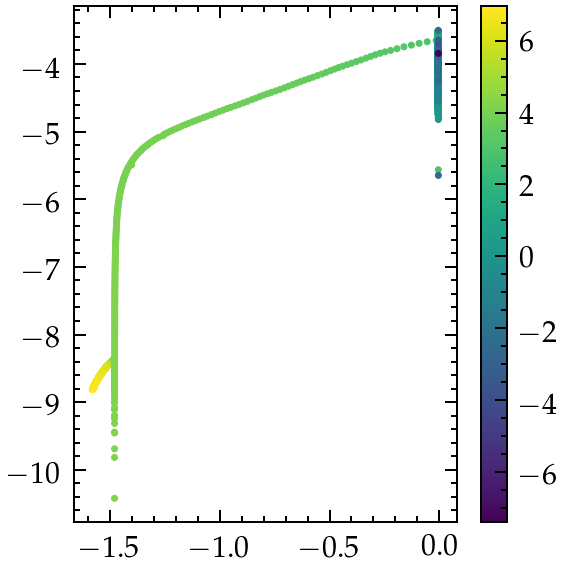

In [6]:
## secondary mass loss as a function of surface omega
def MdotOmegaPlot(hfile):
    src, col = getSrcCol(hfile)
    print(col)
    surf_omega = np.log10(src[:,col.index("surf_avg_v_div_v_crit")])
    mdot = src[:,col.index("log_abs_mdot")]
    t = src[:,col.index("star_age")]
    
    fig=plt.figure()
    ax=fig.add_subplot(111)
    p = ax.scatter(surf_omega, mdot, c=np.log10(t[-1]-t))
    cb = fig.colorbar(p)
    
#
folder="/mnt/home/mrenzo/RUNS/simple_binary/"
MdotOmegaPlot(folder+'/LOGS2/history.data')

['model_number', 'age', 'period_days', 'binary_separation', 'v_orb_1', 'v_orb_2', 'rl_1', 'rl_2', 'rl_relative_overflow_1', 'rl_relative_overflow_2', 'star_1_mass', 'star_2_mass', 'lg_mtransfer_rate', 'lg_mstar_dot_1', 'lg_mstar_dot_2', 'lg_system_mdot_1', 'lg_system_mdot_2', 'lg_wind_mdot_1', 'lg_wind_mdot_2', 'fixed_xfer_fraction', 'eff_xfer_fraction', 'J_orb', 'Jdot', 'jdot_mb', 'jdot_gr', 'jdot_ml', 'jdot_ls', 'jdot_missing_wind', 'extra_jdot', 'donor_index', 'point_mass_index']


/mnt/home/mrenzo/anaconda3/envs/py3/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in log10
  from ipykernel import kernelapp as app
/mnt/home/mrenzo/anaconda3/envs/py3/lib/python3.7/site-packages/IPython/core/events.py:88: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  func(*args, **kwargs)
/mnt/home/mrenzo/anaconda3/envs/py3/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  fig.canvas.print_figure(bytes_io, **kw)


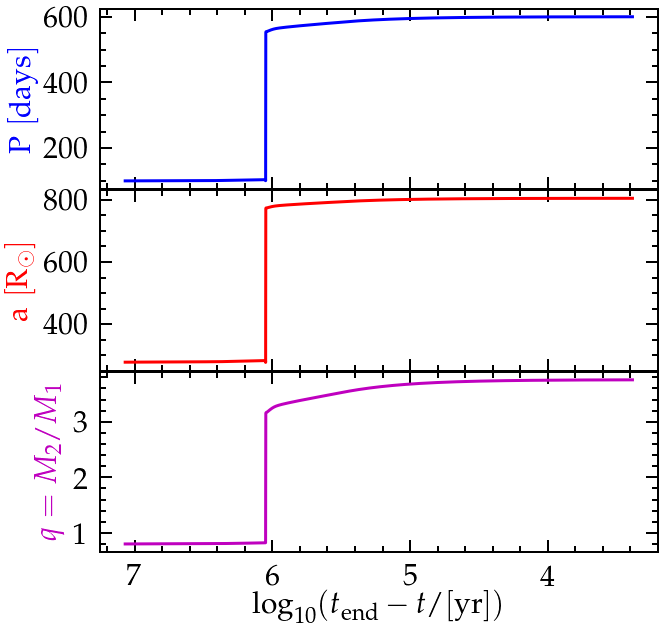

In [12]:
# period vs time
def plotPqa_t(folder, figName=""):
    LOGS1 = folder+"/LOGS1/"
    LOGS2 = folder+"/LOGS2/"
    outfile = folder+'output'
    srcb, colb = getSrcCol(folder+'/binary_history.data')
    print(colb)
    src1, col1 = getSrcCol(LOGS1+'/history.data')
    src2, col2 = getSrcCol(LOGS2+'/history.data')

    a =  srcb[:, colb.index("binary_separation")]
    P = srcb[:, colb.index("period_days")]
    q = srcb[:, colb.index("star_2_mass")]/srcb[:, colb.index("star_1_mass")]
    t = srcb[:, colb.index("age")]
    t = np.log10(t[-1]-t)
    
    fig=plt.figure(figsize=(10, 10.))
    gs = gridspec.GridSpec(90, 90)
    ax1 = fig.add_subplot(gs[:30,:])
    ax2 = fig.add_subplot(gs[30:60,:])
    ax3 = fig.add_subplot(gs[60:,:])
    axes = [ax1,ax2,ax3]
    for ax in axes:
        ax.invert_xaxis()
    ax1.plot(t, P, c='b', lw=3)
    ax2.plot(t, a, c='r', lw=3)
    ax3.plot(t, q, c='m', lw=3)

    # ax3.set_xlabel(r"$\mathrm{t \ [yr]}$", size=30)
    ax3.set_xlabel(r"$\log_{10}(t_\mathrm{end}-t/\mathrm{[yr]})$", size=30)
    ax1.set_ylabel(r"$\mathrm{P \ [days]}$", size=30, color='b')
    ax2.set_ylabel(r"$\mathrm{a \ [R_\odot]}$", size=30, color='r')
    ax3.set_ylabel(r"$q=M_2/M_1$", size=30, color='m')
    if figName!="":
        plt.savefig(figName)

# folder = "/mnt/home/mrenzo/RUNS/simple_binary/10_8.8/"  
# test
plotPqa_t(folder)    

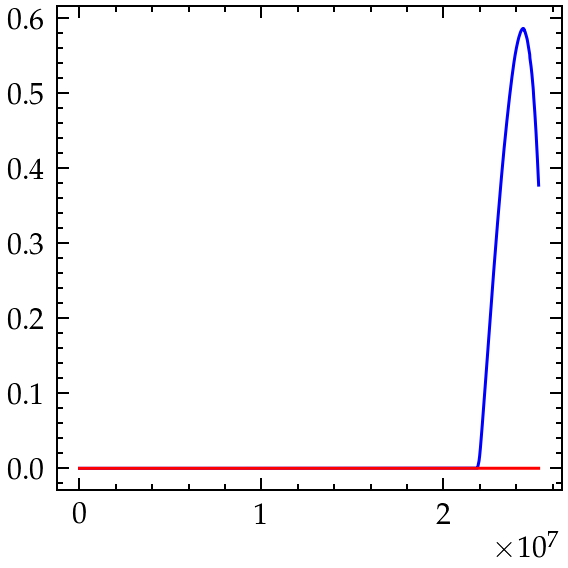

In [24]:
## central he abundance as a function of time
def plotHecenter(hfile, color="b", ax="", revert=False):
    if ax == "":
        fig=plt.figure()
        ax=fig.add_subplot(111)
        
    src, col = getSrcCol(hfile)
    t = src[:, col.index("star_age")]
    if revert:
        t = np.log10(t[-1]-t)
    he_center = src[:, col.index("center_c12")]
    ax.plot(t, he_center, c=color, lw=3, label=r"$^4\mathrm{He}$")


def plotHecenter_both(folder, revert=False):
    fig=plt.figure()
    ax=fig.add_subplot(111)

    # donor
    hfile1=folder+"LOGS1/history.data"    
    c1 = 'b'
    plotHecenter(hfile1, c1, ax, revert)
    #accretor
    hfile2=folder+"LOGS2/history.data"    
    c2 = 'r'
    plotHecenter(hfile2, c2, ax, revert)

    if revert:
        ax.invert_xaxis()

plotHecenter_both("/mnt/home/mrenzo/RUNS/simple_binary/", revert=False)
        

In [ ]:
def energyProfile(pfile):
    fig=plt.figure(figsize=(10, 10.))
    ax=fig.add_subplot(111)
    src, col = getSrcCol(pfile)
    m = src[:, col.index("mass")]
    z = src[:, col.index("zone")]
    e = src[:, col.index("energy")]

    ax.plot(m,e)
    ax.set_yscale('log')
    ax.axhline(1e16,0,1)
    ax.set_xlabel(r"$M \ [M_\odot]$", size=30)
    ax.set_ylabel(r"$\mathrm{energy} \ \mathrm{erg}$", size=30)
    
# test
folder = "/mnt/home/mrenzo/RUNS/binary_PP/re-try/LOGS2/"
energyProfile(folder+getFinalProfileLOGS(folder))

In [ ]:
def plotEntropy(MESAfolder, outf=""):
    LOGS1 = MESAfolder+"/LOGS1/"
    LOGS2 = MESAfolder+"/LOGS2/"
    final_donor = LOGS1+getFinalProfileLOGS(LOGS1)
    final_accretor = LOGS2+getFinalProfileLOGS(LOGS2)
    src1, col1 = getSrcCol(final_donor)
    print(col1)
    src2, col2 = getSrcCol(final_accretor)
    m_1  = src1[:, col1.index("mass")]
    s_1 = src1[:, col1.index("entropy")]
    m_2  = src2[:, col2.index("mass")]
    s_2 = src2[:, col2.index("entropy")]

    fig=plt.figure(figsize=(10, 10.))
    ax=fig.add_subplot(111)
    ax.plot(m_1, s_1, ls='-', lw=3, c='b')
    ax.plot(m_2, s_2, ls='-', lw=3, c='r')
    ax.set_xlabel(r"$M \ [M_\odot]$", size=30)
    ax.set_ylabel(r"$s \ [k_BN_A]$", size=30)

plotEntropy("/mnt/home/mrenzo/RUNS/binary_PP/100_80_P7_thermohaline/")

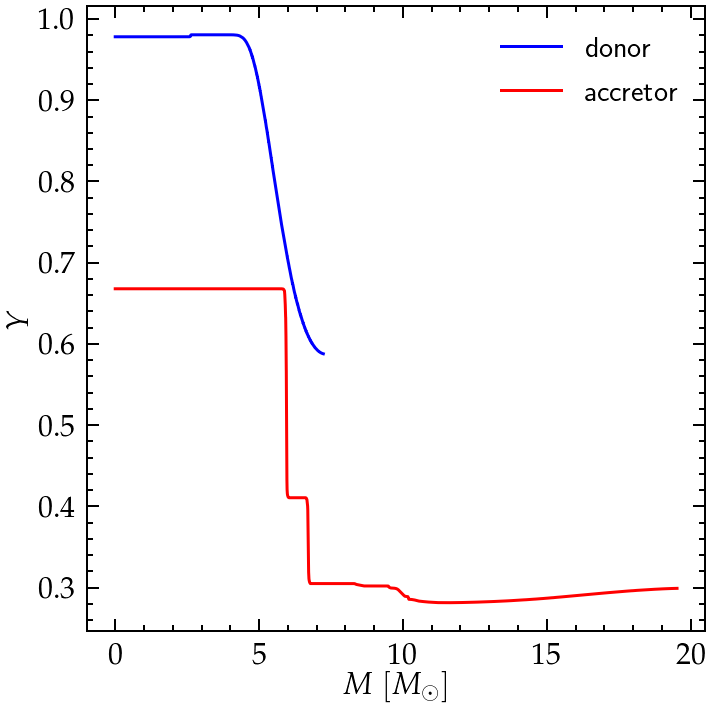

In [7]:
def plotHe(MESAfolder, outf=""):
    LOGS1 = MESAfolder+"/LOGS1/"
    LOGS2 = MESAfolder+"/LOGS2/"
    final_donor = LOGS1+getFinalProfileLOGS(LOGS1)
    final_accretor = LOGS2+getFinalProfileLOGS(LOGS2)
    src1, col1 = getSrcCol(final_donor)
    src2, col2 = getSrcCol(final_accretor)
    m_1  = src1[:, col1.index("mass")]
    he4_1 = src1[:, col1.index("he4")]
    m_2  = src2[:, col2.index("mass")]
    he4_2 = src2[:, col2.index("he4")]

    fig=plt.figure(figsize=(10, 10.))
    ax=fig.add_subplot(111)
    ax.plot(m_1, he4_1, ls='-', lw=3, c='b', label=r"donor")
    ax.plot(m_2, he4_2, ls='-', lw=3, c='r', label=r"accretor")
    ax.set_xlabel(r"$M \ [M_\odot]$", size=30)
    ax.set_ylabel(r"$Y$", size=30)
    ax.legend()
    
plotHe(folder) # "/mnt/home/mrenzo/RUNS/binary_PP/100_80_P7_thermohaline/")

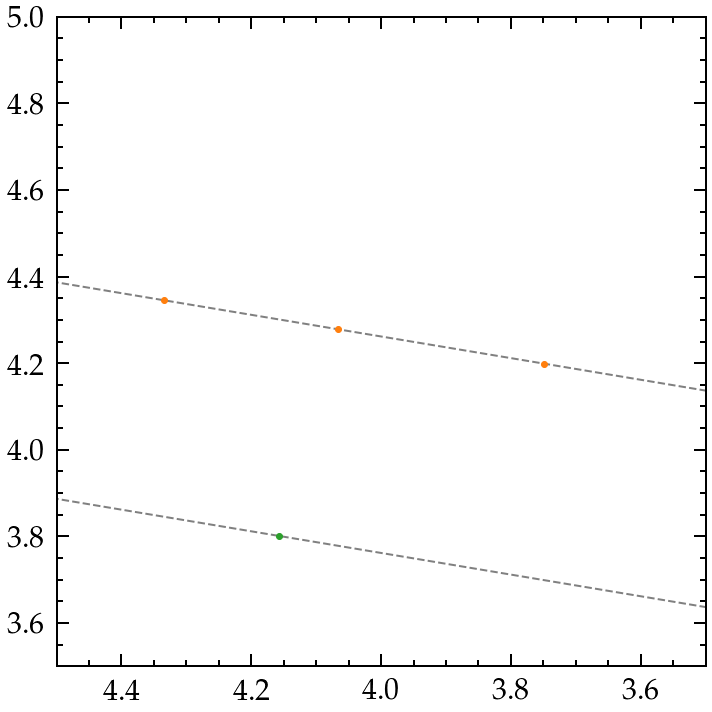

In [12]:
def LTeff_fixedR(Teff, r=1):
    """ 
    assumes r is in Rsun and Teff in K
    returns 4pir^2Teff^4 in Lsun units
    """
    boltz_sigma = 5.670400e-5
    L = 4*math.pi*boltz_sigma*(r*Rsun_cm*r*Rsun_cm*Teff*Teff*Teff*Teff) # erg/s
    L = L/Lsun #Lsun
    return L

#test
#print(LTeff_fixedR(5770,1))

def plotRonHR(ax):
    """
    plots the L(Teff) relation for fixed logspaced radii
    assumes ax is the axes of an HR diagram plot
    also assumes boundaries of ax are already set in log10-scale
    so use after plotting data on ax
    """
    # R = np.array([1,2,3,4,5,6,7,8,9,10,20,30,40,50,60,70,80,90,100,200,300,400,500,600,700,800,1000,2000,3000,4000]) #Rsun
    # R = [10]
    R = [1,10,100]    
    xmin, xmax = ax.get_xlim()
    # print(xmin, xmax)
    Teff = np.linspace(10.**(xmin), 10.**(xmax),10) # kelvin
    # print(Teff)
    for r in R:
        lw = 1
        L = LTeff_fixedR(Teff,r)
        if '1' in str(r):
            lw=2
            # xtext = np.log10(L)[0]
            # ytext = np.log10(Teff)[0]
            # if ((xtext < xmax) and (xtext > xmin)) and ((ytext < ymax) and (ytext > ymin)):
            #     ax.text(xtext, ytext, f"$R={r}\,R_\odot$", zorder=0, color="#808080", fontsize=20,va="center", ha="center", transform=ax.transData)
        ax.plot(np.log10(L), np.log10(Teff), lw=lw, ls='--',color="#808080", zorder=0)
        ax.scatter(np.log10(L), np.log10(Teff))
    # reset axes limits
    ax.set_xlim(xmin, xmax)    


fig=plt.figure(figsize=(10, 10.))
ax=fig.add_subplot(111)
ax.set_xlim(4.5,3.5)
ax.set_ylim(3.5,5)
plotRonHR(ax)

In [1]:
def mixOneStar(pfile):
    src, col = getSrcCol(pfile)
    # for c in col:
    #     if "log_D" in c:
    #         print(c)
    ### # load data
    m = src[:, col.index("mass")]
    Dmix = src[:, col.index("log_D_mix")]
    Dmix_nonrot = src[:, col.index("log_D_mix_non_rotation")]
    Dconv = src[:, col.index("log_D_conv")]
    Dsemi = src[:, col.index("log_D_semi")]
    Dthrm = src[:, col.index("log_D_thrm")]

    am_Dvisc= src[:, col.index("am_log_D_visc")]
    am_DDSI  = src[:, col.index("am_log_D_DSI")]
    am_DDSH  = src[:, col.index("am_log_D_SH")]
    am_DSSI  = src[:, col.index("am_log_D_SSI")]
    am_DES   = src[:, col.index("am_log_D_ES")]
    am_DGSF  = src[:, col.index("am_log_D_GSF")]
    am_DST   = src[:, col.index("am_log_D_ST")]
    
    fig=plt.figure()
    ax=fig.add_subplot(111)
    ax.plot(m, Dmix, c='r', lw=5, label=r"tot")
    ax.plot(m, Dmix_nonrot, label=r"non rot")
    ax.plot(m, Dconv, label=r"conv")
    ax.plot(m, Dsemi, label=r"semi")
    ax.plot(m, Dthrm, label=r"therm")
    ax.plot(m, am_Dvisc , label=r"visc")
    ax.plot(m, am_DDSI  , label=r"DSI")
    ax.plot(m, am_DDSH  , label=r"SH")
    ax.plot(m, am_DSSI  , label=r"SSI")
    ax.plot(m, am_DES   , label=r"DES")
    ax.plot(m, am_DGSF  , label=r"GSF")
    ax.plot(m, am_DST   , label=r"ST")
    # ax.plot(m, am_Dnu_ST, label=r"nu ST")

    l=ax.legend(ncol=3, fontsize=20) #, bbox_to_anchor=(1.05,1.05))

    ax.set_xlim(xmin=7, xmax=7.15)
    ax.set_ylim(ymin=0)
    ax.set_xlabel(r"$M \ [M_\odot]$")
    ax.set_ylabel(r"$\log_{10}(D_\mathrm{mix})$")
# for pfile in glob.glob("/mnt/home/mrenzo/RUNS/binary_PP/100_80_P7/LOGS2/profile*.data"):
#     try:    
#         mixOneStar(pfile)    
#     except:
#         print(colored(pfile+" not working", "red"))
#         pass
mixOneStar(folder+"/LOGS1/"+getFinalProfileLOGS(folder+"LOGS1/"))    

NameError: name 'folder' is not defined

In [ ]:
def mkmuprofile(pfile):
    fig=plt.figure(figsize=(10, 10.))
    ax=fig.add_subplot(111)
    bx = ax.twinx()
    
    src, col = getSrcCol(pfile)
    m = src[:, col.index("mass")]
    mu = src[:, col.index("mu")]
    r = src[:, col.index("radius")]

    
    F = open(pfile,'r')
    for i, line in enumerate(F):
        if i ==1:
            head_col = line.split()
            if i ==2:
            data = line.split()
            age = float(data[head_col.index("star_age")])
    F.close()

    
    ax.plot(m, mu, c='b',lw=3, ls='-', label=r"$\mu$", zorder=2)
    bx.plot(m, np.gradient(mu, r), c='r', ls='--', zorder=1, label=r"$d \mu / d r$")

    ax.set_xlabel(r"$M \ [M_\odot]$", fontsize=30)
    ax.set_ylabel(r"$\mu$", fontsize=30, color='b')
    bx.set_ylabel(r"$d\mu/dr$", fontsize=30, color='r')
    bx.set_yscale('log')
    ax.tick_params(axis='both', which='major', width=2, length=12, pad=10, labelsize=30, direction='in', top="on", right="on")
    ax.tick_params(axis='both', which='minor', width=2, length=6, pad=10, direction='in', top="on", right="on")
    # l = ax.legend(loc="upper right", fontsize=30)
    # l.draw_frame(False)
    ax.set_ylim(0,1)
    ax.set_xlim(0,max(m)+1)
    ax.yaxis.set_major_locator(MultipleLocator(0.2))
    ax.yaxis.set_minor_locator(MultipleLocator(0.1))
    ax.xaxis.set_major_locator(MultipleLocator(5))
    ax.xaxis.set_minor_locator(MultipleLocator(2.5))
    ax.text(0.5,0.5, r"$\mathrm{t}=%.1f\,\mathrm{yr}$"%float(age), fontsize=30, va="center", ha="center", zorder=0, transform=ax.transAxes)
    plt.tight_layout()
    outfname="%.1f"%float(age)+"abundance.png"
    plt.savefig("/mnt/home/mrenzo/TMP/"+outfname)

folder = "/mnt/home/mrenzo/RUNS/binary_PP/100_80_P7_thermohaline/semiconvection_high/LOGS2/"
pfile = folder+getFinalProfileLOGS(folder)
mkmuprofile(pfile)


/mnt/home/mrenzo/anaconda3/envs/py3/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in log10


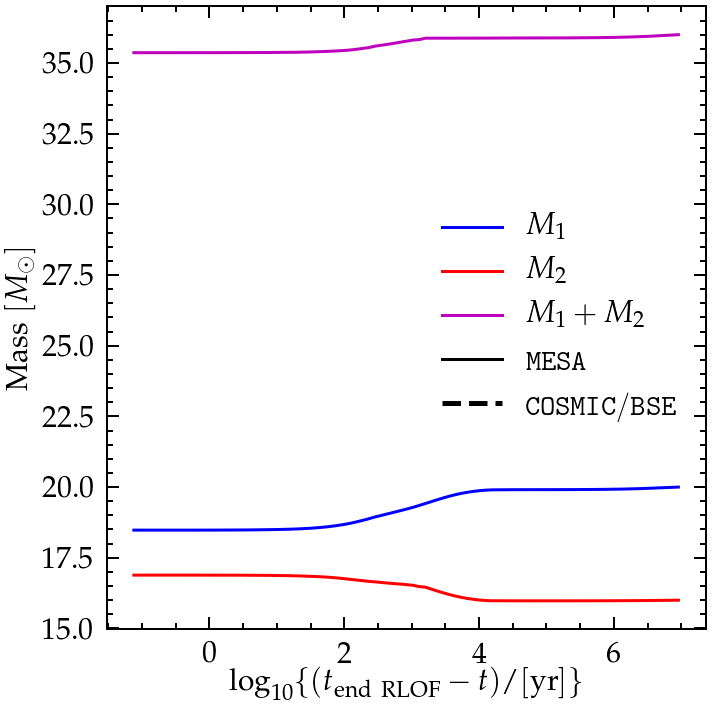

In [14]:
# mass vs time
def M_t(f):
    LOGS1 = f+"/LOGS1/"
    LOGS2 = f+"/LOGS2/"

    srcb, colb = getSrcCol(f+'/binary_history.data')
    # print(colb)
    src1, col1 = getSrcCol(LOGS1+'/history.data')
    src2, col2 = getSrcCol(LOGS2+'/history.data')

    m1 = srcb[:, colb.index("star_1_mass")]
    mdot1 = src1[:, col1.index("log_abs_mdot")]
    mdot2 = src2[:, col2.index("log_abs_mdot")]
    m2 = srcb[:, colb.index("star_2_mass")]
    mtot = m1+m2
    t = srcb[:, colb.index("age")]
    t = np.log10(t[-1]-t)
    # get beginning RLOF
    rl_1 = srcb[:, colb.index("rl_1")]
    r1 = 10**(src1[:, col1.index("log_R")])
    ind = r1 >= rl_1
    
    fig=plt.figure(figsize=(10, 10.))
    ax=fig.add_subplot(111)
    # bx = ax.twinx()
    # ax.axvline(min(t[ind]), 0,1,ls='--', lw=2,c="#808080")
    ax.plot(t,m1, c='b', lw=3, label=r"$M_1$")
    ax.plot(t,m2,lw=3, c='r', label=r"$M_2$")
    ax.plot(t,mtot,lw=3,c='m', label=r"$M_1+M_2$")
    #ax.invert_xaxis()
    ax.set_ylabel(r"$\mathrm{Mass} \ [M_\odot]$", fontsize=30)
    ax.set_xlabel(r"$\log_{10}\{(t_\mathrm{end\ RLOF} -t)/\mathrm{[yr]}\}$", fontsize=30)
    ax.plot(np.nan,np.nan, c='k', lw=3, label=r"\texttt{MESA}")
    ax.plot(np.nan,np.nan, c='k', ls='--', lw=5, label=r"\texttt{COSMIC}/\texttt{BSE}")

    l=ax.legend(fontsize=30)
    l.draw_frame(False)

    
    plt.tight_layout()
#test
M_t("/mnt/home/mrenzo/RUNS/simple_binary/")

In [40]:
#opacity profile
def plotKappa(pfile):
    fig=plt.figure(figsize=(10, 10.))
    ax=fig.add_subplot(111)
    src, col = getSrcCol(pfile)
    m = src[:, col.index("mass")]
    k = src[:, col.index("opacity")]
    ax.plot(m, k, lw=3)
    ax.set_xlabel(r"$M \ [M_\odot]$", size=30)
    ax.set_ylabel(r"$\kappa \ [\mathrm{cm^2 \ g^{-1}}]$", size=30)

    # test
#folder = "/mnt/home/mrenzo/RUNS/binary_PP/100_80_P7_thermohaline/LOGS2/"
pfile = folder+getFinalProfileLOGS(folder)
plotKappa(pfile)    


IndexError: list index out of range

In [ ]:
def omegaCrit(pfile):
    # returns omegacrit as a function of radius
    # see also $MESA_DIR/star/private/star_utils.f90 routine omega_crit
    src, col = getSrcCol(pfile)
    m = src[:, col.index("mass")]*Msun
    r = 10.0**(src[:, col.index("logR")])*Rsun_cm
    # clight = 2.99792458e10
    # kappa = src[:, col.index("opacity")]
    # Ledd = 4*math.pi*clight*G_cgs*m/kappa
    Lrad_div_Ledd = 10.0**(src[:, col.index("log_Lrad_div_Ledd")])    
    gamma_factor = 1.0 - min_array(Lrad_div_Ledd, [0.9999e0]*len(Lrad_div_Ledd))
    omega_crit = np.sqrt(gamma_factor*G_cgs*m/(r**3.0))
    return omega_crit

    

def plotOmega(pfile):
    fig=plt.figure(figsize=(10, 10.))
    ax=fig.add_subplot(111)
    bx = ax.twinx()
    src, col = getSrcCol(pfile)
    m = src[:, col.index("mass")]
    omega = src[:, col.index("omega")]
    omega_crit = omegaCrit(pfile)
    # print(col)
    F = open(pfile,'r')
    for i, line in enumerate(F):
        if i ==1:
            head_col = line.split()
        if i ==2:
            data = line.split()
            age = float(data[head_col.index("star_age")])
    F.close()

    
    ax.plot(m, omega, c='b',lw=3, ls='-', label=r"$\omega$")
    bx.plot(m, omega/omega_crit, c='r',lw=3, ls='-', label=r"$\omega/\omega_\mathrm{crit}$")
    

    ax.set_xlabel(r"$M \ [M_\odot]$", fontsize=30)
    ax.set_ylabel(r"$\omega$", color="blue", fontsize=30)
    bx.set_ylabel(r"$\omega/\omega_\mathrm{crit}$",color="red", fontsize=30)
    ax.tick_params(axis='both', which='major', width=2, length=12, pad=10, labelsize=30, direction='in', top="on", right="on")
    ax.tick_params(axis='both', which='minor', width=2, length=6, pad=10, direction='in', top="on", right="on")
    # l = ax.legend(loc="upper right", fontsize=30)
    # l.draw_frame(False)
    #ax.set_ylim(0,1)
    #ax.set_xlim(0,max(m)+1)
    # ax.yaxis.set_major_locator(MultipleLocator(0.2))
    # ax.yaxis.set_minor_locator(MultipleLocator(0.1))
    # ax.xaxis.set_major_locator(MultipleLocator(5))
    # ax.xaxis.set_minor_locator(MultipleLocator(2.5))
    # ax.text(10,0.9, r"$\mathrm{t}=%.1f\,\mathrm{yr}$"%float(age), fontsize=30, va="center", ha="center")
    plt.tight_layout()
    outfname="%.1f"%float(age)+"abundance.png"
    plt.savefig("/mnt/home/mrenzo/TMP/"+outfname)


folder = "/mnt/home/mrenzo/RUNS/"
pfile = folder+"profile3.data" #getFinalProfileLOGS(folder)
plotOmega(pfile)    

# for pfile in glob.glob(folder+"/profile*.data"):
#     plotOmega(pfile)    



In [ ]:
def mix_profile(MESAfolder, outf=""):
    # 'log_D_mix', 'log_D_mix_non_rotation', 'log_D_conv',
    # 'log_D_semi', 'log_D_thrm', 'omega', 'am_log_D_visc',
    # 'am_log_D_DSI', 'am_log_D_SH', 'am_log_D_SSI',
    # 'am_log_D_ES', 'am_log_D_GSF', 'am_log_D_ST', 'am_log_nu_ST'
    LOGS1 = MESAfolder+"/LOGS1/"
    LOGS2 = MESAfolder+"/LOGS2/"
    final_donor = LOGS1+getFinalProfileLOGS(LOGS1)
    final_accretor = LOGS2+getFinalProfileLOGS(LOGS2)
    src1, col1 = getSrcCol(final_donor)
    src2, col2 = getSrcCol(final_accretor)
    #print(col1, col2)
    m_1  = src1[:, col1.index("mass")]
    Dmix1 = src1[:, col1.index("log_D_mix")]
    Dmix_nonrot1 = src1[:, col1.index("log_D_mix_non_rotation")]
    Dconv1 = src1[:, col1.index("log_D_conv")]
    Dsemi1 = src1[:, col1.index("log_D_semi")]
    Dthrm1 = src1[:, col1.index("log_D_thrm")]
    # Dvisc1 = src1[:, col1.index("log_D_visc")]
    # DDSI1 = src1[:, col1.index("log_D_DSI")]
    # DSH1 = src1[:, col1.index("log_D_SH")]
    # DSSI1 = src1[:, col1.index("log_D_SSI")]
    # DES1 = src1[:, col1.index("log_D_ES")]
    # DGSF1 = src1[:, col1.index("log_D_GSF")]
    # DST1 = src1[:, col1.index("log_D_ST")]
    # Dnu_ST1 = src1[:, col1.index("log_D_nu_ST")]


    
    # omega1 = src1[:, col1.index("omega")]
    m_2  = src2[:, col2.index("mass")]
    Dmix2 = src2[:, col2.index("log_D_mix")]
    Dmix_nonrot2 = src2[:, col2.index("log_D_mix_non_rotation")]
    Dconv2 = src2[:, col2.index("log_D_conv")]
    Dsemi2 = src2[:, col2.index("log_D_semi")]
    Dthrm2 = src2[:, col2.index("log_D_thrm")]
    # Dvisc2 = src2[:, col2.index("log_D_visc")]
    # DDSI2 = src2[:, col2.index("log_D_DSI")]
    # DSH2 = src2[:, col2.index("log_D_SH")]
    # DSSI2 = src2[:, col2.index("log_D_SSI")]
    # DES2 = src2[:, col2.index("log_D_ES")]
    # DGSF2 = src2[:, col2.index("log_D_GSF")]
    # DST2 = src2[:, col2.index("log_D_ST")]
    # Dnu_ST2 = src2[:, col2.index("log_D_nu_ST")]
    # omega2 = src2[:, col2.index("omega")]

    fig=plt.figure(figsize=(10, 10.))
    ax=fig.add_subplot(111)
    # bx = ax.twinx()             #
    # ax.plot(m_1, Dmix1, c='b', lw=5, label=r"tot")
    # ax.plot(m_1, Dmix_nonrot1, label=r"non rot")
    # ax.plot(m_1, Dconv1, label=r"conv")
    # ax.plot(m_1, Dsemi1, label=r"semi")
    # ax.plot(m_1, Dthrm1, label=r"therm")
    ## ax.plot(m_1, Dvisc1, label=r"visc")
    # ax.plot(m_1, DDSI1, label=r"DSI")
    # ax.plot(m_1, DDSH1, label=r"SH")
    # ax.plot(m_1, DSSI1, label=r"SSI")
    # ax.plot(m_1, DES1, label=r"DES")
    # ax.plot(m_1, DGSF1, label=r"GSF")
    # ax.plot(m_1, DST1, label=r"ST")
    # ax.plot(m_1, Dnu_ST1, label=r"nu ST")
    # ax.plot(m_2, Dmix2, c='r', lw=5, label=r"tot")
    ax.plot(m_2, Dmix_nonrot2, label=r"non rot", lw=5)
    ax.plot(m_2, Dconv2, label=r"conv")
    ax.plot(m_2, Dsemi2, label=r"semi")
    ax.plot(m_2, Dthrm2, label=r"therm")
    ## ax.plot(m_2, Dvisc2, label=r"visc")
    # ax.plot(m_2, DDSI2, label=r"DSI")
    # ax.plot(m_2, DDSH2, label=r"SH")
    # ax.plot(m_2, DSSI2, label=r"SSI")
    # ax.plot(m_2, DES2, label=r"DES")
    # ax.plot(m_2, DGSF2, label=r"GSF")
    # ax.plot(m_2, DST2, label=r"ST")
    # ax.plot(m_2, Dnu_ST2, label=r"nu ST")

    l=ax.legend(fontsize=30, bbox_to_anchor=(1.05,1.05))
    l.draw_frame(False)

    ax.set_ylim(ymin=0)

    
    # bx.plot(m_1, omega1, c='b', ls='--')
    # bx.plot(m_2, omega2, c='r', ls='--')

    
mix_profile("/mnt/home/mrenzo/RUNS/binary_PP/100_80_P7_thermohaline//")

Text(0.5, 0.5, 'from van Haaften \\emph{et al.} 13')

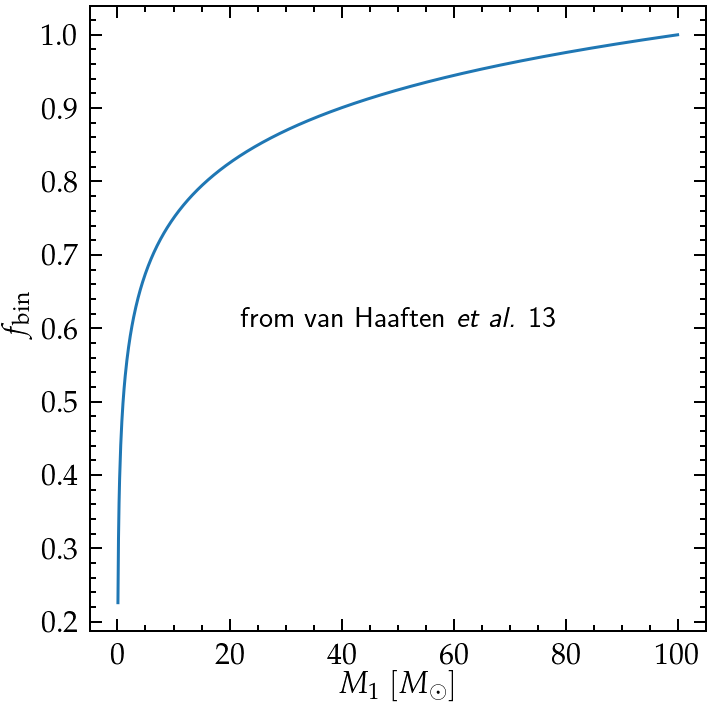

In [67]:
def fbin(M1):
    return 0.5+0.25*np.log10(M1)
fig=plt.figure(figsize=(10, 10.))
ax=fig.add_subplot(111)
M1 = np.linspace(0.08,100,1000)
ax.plot(M1,fbin(M1))
ax.set_xlabel(r"$M_1 \ [M_\odot]$")
ax.set_ylabel(r"$f_\mathrm{bin}$")
ax.text(0.5,0.5,r"from van Haaften \emph{et al.} 13", fontsize=30, transform=ax.transAxes, va="center", ha="center" )

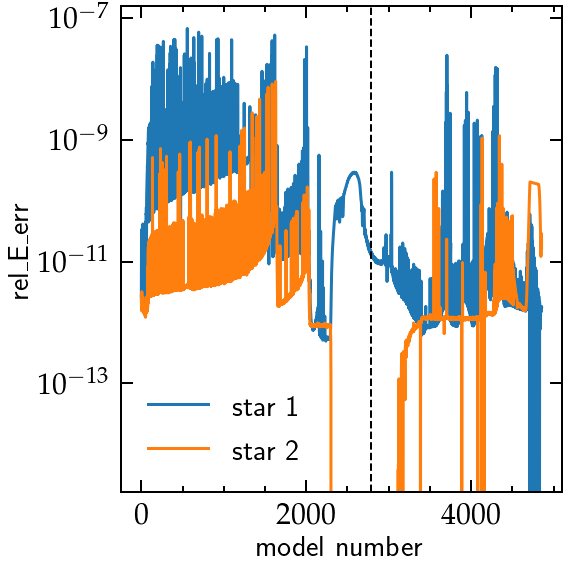

In [ ]:
def test_E_conservation(folder, convert=False):
    fig=plt.figure()
    ax=fig.add_subplot(111)
    # star 1
    src, col = getSrcCol(folder+'/LOGS1/history.data',convert, convert)
    err = src[:, col.index("rel_E_err")]
    mn = src[:, col.index("model_number")]
    ax.plot(mn, err, label=r"star 1")
    he_donor = src[:, col.index("surface_he4")]
    i = np.argmin(np.absolute(0.5-he_donor))
    ax.axvline(i, c='k', ls='--', lw=2)
    #star 2
    src, col = getSrcCol(folder+'/LOGS2/history.data',convert, convert)
    err = src[:, col.index("rel_E_err")]
    mn = src[:, col.index("model_number")]
    ax.plot(mn, err, label=r"star 2")
    ax.set_xlabel(r"model number")
    ax.set_ylabel(r"rel\_E\_err")
    ax.set_yscale('log')
    ax.legend()


# test
test_E_conservation('/mnt/home/mrenzo/RUNS/mesa_develop_testing/post_adam_fix/', True)